In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
import matplotlib.pyplot as plt
import pandas as pd
import os

In [10]:
if torch.cuda.is_available():
    device = torch.device("cuda")
    print("CUDA(GPU)를 사용합니다.")
else:
    device = torch.device("cpu")
    print("CUDA(GPU)를 사용할 수 없으므로, CPU를 사용합니다.")

CUDA(GPU)를 사용할 수 없으므로, CPU를 사용합니다.


In [174]:
df = pd.read_csv('./styles2.csv')
df

,id,masterCategory,subCategory,articleType,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,15970,Apparel,Topwear,Shirts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,39386,Apparel,Bottomwear,Jeans,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,59263,Accessories,Watches,Watches,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21379,Apparel,Bottomwear,Track Pants,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,53759,Apparel,Topwear,Tshirts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
44441,17036,Footwear,Shoes,Casual Shoes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44442,6461,Footwear,Flip Flops,Flip Flops,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44443,18842,Apparel,Topwear,Tshirts,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44444,46694,Personal Care,Fragrance,Perfume and Body Mist,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
df.loc[df['subCategory'].isin(['Sandal', 'Flip Flops']), 'subCategory'] = 'Shoes'
df.loc[df['subCategory'].isin(['Dress']), 'subCategory'] = 'Topwear'
df2 = df[df['subCategory'].isin(['Topwear', 'Shoes', 'Bags','Bottomwear', 'Watches', 'Innerwear', 'Eyewear', 'Wallets', 'Belts'])]
label_df = df2[['id','subCategory']].rename(columns = {'subCategory':'label'})

In [176]:
cur_dir = os.getcwd()

In [177]:
img_path = "./archive/images/"
img_list = os.listdir(img_path)
img_list

['10000.jpg',
 '10001.jpg',
 '10002.jpg',
 '10003.jpg',
 '10004.jpg',
 '10005.jpg',
 '10006.jpg',
 '10007.jpg',
 '10008.jpg',
 '10009.jpg',
 '10010.jpg',
 '10011.jpg',
 '10012.jpg',
 '10013.jpg',
 '10014.jpg',
 '10015.jpg',
 '10016.jpg',
 '10017.jpg',
 '10018.jpg',
 '10019.jpg',
 '10020.jpg',
 '10021.jpg',
 '10022.jpg',
 '10023.jpg',
 '10024.jpg',
 '10025.jpg',
 '10026.jpg',
 '10027.jpg',
 '10028.jpg',
 '10029.jpg',
 '10030.jpg',
 '10031.jpg',
 '10032.jpg',
 '10033.jpg',
 '10034.jpg',
 '10035.jpg',
 '10037.jpg',
 '10039.jpg',
 '10040.jpg',
 '10041.jpg',
 '10042.jpg',
 '10043.jpg',
 '10044.jpg',
 '10045.jpg',
 '10046.jpg',
 '10047.jpg',
 '10048.jpg',
 '10049.jpg',
 '10050.jpg',
 '10051.jpg',
 '10052.jpg',
 '10053.jpg',
 '10054.jpg',
 '10056.jpg',
 '10057.jpg',
 '10058.jpg',
 '10059.jpg',
 '10060.jpg',
 '10061.jpg',
 '10062.jpg',
 '10063.jpg',
 '10064.jpg',
 '10065.jpg',
 '10066.jpg',
 '10067.jpg',
 '10068.jpg',
 '10069.jpg',
 '10070.jpg',
 '10071.jpg',
 '10072.jpg',
 '10073.jpg',
 '1007

In [178]:
import cv2 as cv
import numpy as np

In [179]:
### 라벨 인코딩 ###
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
label = label_encoder.fit_transform(label_df.label)
label_df["label"] = label

In [203]:
def load_train_img(df):
    train_img = []
    test_img = []
    
    for _ in range(0, int(len(df) * 0.8)):
        try:
            label = df.label[_]
            img = cv.resize(cv.imread(df.path[_]), (64, 64))
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img = img / 255.0
            img = np.transpose(img, (2, 0, 1))  # 채널 차원을 앞으로 옮김
            train_img.append((img, label))
        except:
            pass
    for _ in range(int(len(df) * 0.8) + 1, len(df)):
        try:
            label = df.label[_]
            img = cv.resize(cv.imread(df.path[_]), (64, 64))
            img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
            img = img / 255.0
            img = np.transpose(img, (2, 0, 1))  # 채널 차원을 앞으로 옮김
            test_img.append((img, label))
        except:
            pass

    return train_img, test_img

In [181]:
### id에 맞는 path 를 dataframe 형식으로 만들기 ###
label_df["path"] = 0    
for _ in range(60000):
    try:
        label_df["path"][_] = img_path + str(label_df["id"][_]) + ".jpg"
    except:
        pass
label_df.drop(columns = "id", inplace = True)

C:\Users\BIG3-010\AppData\Local\Temp\ipykernel_21904\2673566309.py:5: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  label_df["path"][_] = img_path + str(label_df["id"][_]) + ".jpg"
C:\Users\BIG3-010\AppData\Local\Temp\ipykernel_21904\2673566

In [204]:
train_img, test_img = load_train_img(label_df)
print(f"=============\nDataset\n=============\ntrain: {len(train_img)}\ntest: {len(test_img)}")

Dataset
train: 26001
test: 6465


In [216]:
# 리스트를 PyTorch 텐서로 변환
train_data = [(torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)) for image, label in train_img]
test_data = [(torch.tensor(image, dtype=torch.float32), torch.tensor(label, dtype=torch.long)) for image, label in test_img]

In [217]:
from torch.utils.data import random_split

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((64, 64)),
    transforms.Normalize([0.8542, 0.8367, 0.8306], [0.2618, 0.2745, 0.2787]) # CIFAR10의 평균과 표준편차
])

# 데이터셋 불러오기
# img_dataset = SingleImageFolder(root=data_folder, transform=transform)

# # DataLoader를 사용하여 이미지 데이터를 배치 단위로 불러올 수 있음
# img_data_loader = torch.utils.data.DataLoader(img_dataset, batch_size=128, shuffle=False)

# 데이터셋을 훈련(train) 및 테스트(test) 세트로 나누는 비율 설정
train_size = int(0.8 * len(train_data))
test_size = len(train_data) - train_size

# 데이터셋을 무작위로 분할하여 훈련(train) 및 테스트(test) 세트 생성
train_dataset, test_dataset = random_split(train_data, [train_size, test_size])

# 훈련(train) 및 테스트(test) 데이터 로더 생성
train_data_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True)
test_data_loader = torch.utils.data.DataLoader(test_dataset, batch_size=1000, shuffle=False)

In [214]:
train_data[0][0].shape

torch.Size([3, 64, 64])

In [208]:
class myResNet(nn.Module):
    def __init__(self):
        super(myResNet, self).__init__()
        # ResNet18 모델 로드
        # self.resnet = models.resnet18(pretrained=False, weights=None)
        self.resnet = models.resnet50(pretrained=False)
        # 출력 레이어를 클래스 수에 맞게 조정
        num_ftrs = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_ftrs, 9)
        
    def forward(self, x):
        return self.resnet(x)

In [220]:
# 모델, 손실 함수, 최적화 알고리즘 설정
model = myResNet().to(device) # torch.load('./cloth.pt').to(device)  # 
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=0.05, momentum=0.5)
optimizer = optim.Adam(model.parameters(), lr=0.03)
# optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)

In [221]:
# 손실과 정확도를 저장하기 위한 리스트 초기화
train_losses = []
test_losses = []
train_accuracies = []
test_accuracies = []

In [197]:
# 훈련 함수
def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    correct = 0
    total = 0
    for data, target in train_loader:
        if torch.cuda.is_available():
            data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        train_loss += loss.item()
        loss.backward()
        optimizer.step()

    # 예측값 계산(가장 높은 값을 가진 인덱스)
    _, predicted = torch.max(output.data, 1)
    total += target.size(0)
    # 올바르게 예측된 샘플의 수 업데이트
    correct += (predicted == target).sum().item()

    # 평균 훈련 손실 계산
    train_loss /= len(train_loader)
    train_losses.append(train_loss)
    print(f'Epoch {epoch}, Training loss: {train_loss:.4f}')
    accuracy = 100. * correct / total
    train_accuracies.append(accuracy)

In [198]:
# 테스트 함수
def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            if torch.cuda.is_available():
                data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += criterion(output, target).item()
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item()
    test_loss /= len(test_loader)
    accuracy = 100. * correct / len(test_loader.dataset)
    test_losses.append(test_loss)
    test_accuracies.append(accuracy)
    print(f'Test loss: {test_loss:.4f}, Accuracy: {accuracy:.2f}%')

In [222]:
# 훈련 및 테스트 실행
for epoch in range(1, 6):
    train(model, train_data_loader, optimizer, epoch)
    test(model, test_data_loader)

Epoch 1, Training loss: 2.0716
Test loss: 1.0022, Accuracy: 86.00%
Epoch 2, Training loss: 0.3386
Test loss: 0.2325, Accuracy: 92.60%
Epoch 3, Training loss: 0.2300
Test loss: 0.3505, Accuracy: 93.69%
Epoch 4, Training loss: 0.1800
Test loss: 0.2481, Accuracy: 95.48%
Epoch 5, Training loss: 0.1571
Test loss: 0.1710, Accuracy: 95.75%


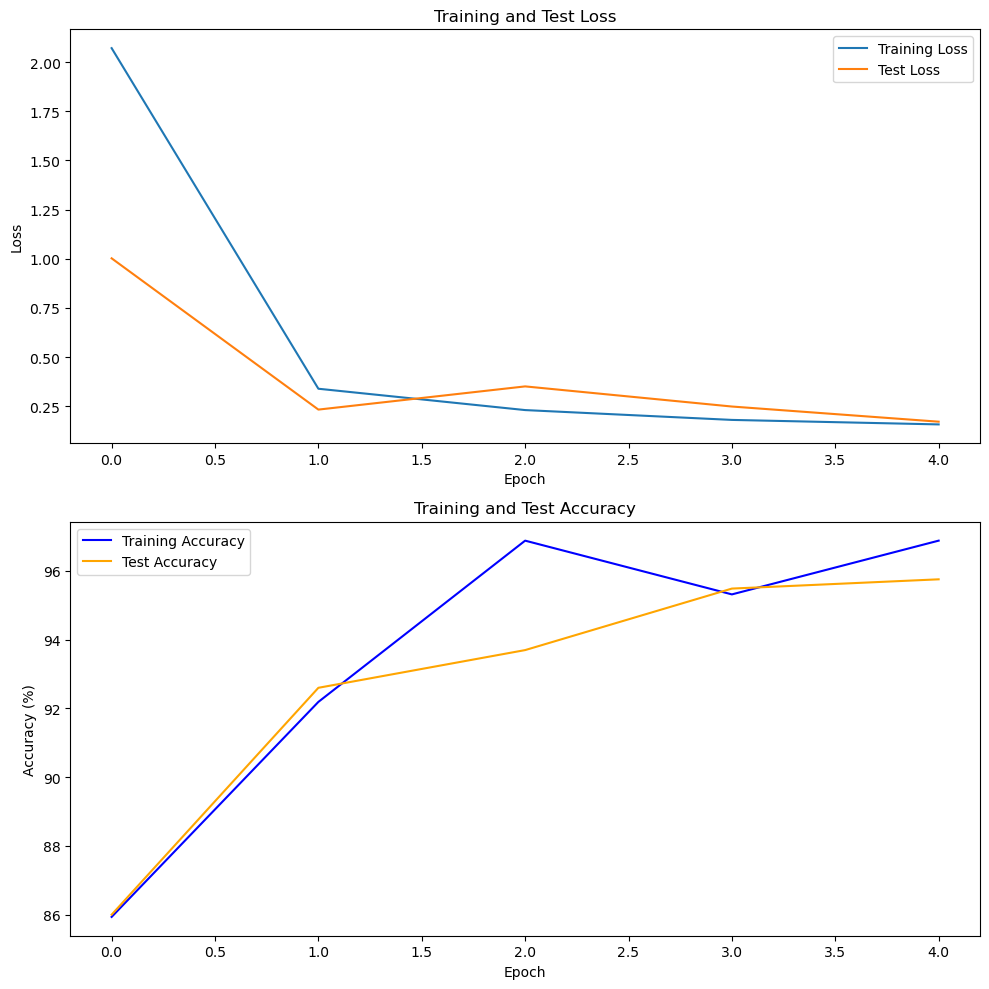

In [223]:
import matplotlib.pyplot as plt

# 손실 및 정확도 시각화
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

axs[0].plot(train_losses, label='Training Loss')
axs[0].plot(test_losses, label='Test Loss')
axs[0].set_xlabel('Epoch')
axs[0].set_ylabel('Loss')
axs[0].legend()
axs[0].set_title('Training and Test Loss')

axs[1].plot(train_accuracies, label='Training Accuracy', color='blue')
axs[1].plot(test_accuracies, label='Test Accuracy', color='orange')
axs[1].set_xlabel('Epoch')
axs[1].set_ylabel('Accuracy (%)')
axs[1].legend()
axs[1].set_title('Training and Test Accuracy')

plt.tight_layout()
plt.show()

In [224]:
# 모델 저장하기
torch.save(model, './clothes_classifier.pt')

In [ ]:
# 모델 가져오기
# model = torch.load('./cloth.pt')